In [1]:
## Send hardest problems through LLMs

import random
import time
import itertools
import numpy as np
import os
import numpy as np
import json
from tqdm import tqdm
from pysat.solvers import Glucose42, Minicard, Lingeling, Cadical153, Minisat22,MapleChrono, Mergesat3
os.chdir('..')
print(os.getcwd()) # Should be ...\ExploringKSAT

from Code.generators import KSAT_Generator
from Code.solvers import brute_force, dpll
ksg = KSAT_Generator()
#ksg.kcnf_to_cnf(hardest_problem[1]]

C:\Users\shairozs\Documents\Projects\ExploringKSAT


In [36]:
ksg = KSAT_Generator()

folder = r'C:/Users/shairozs/Documents/Projects/ExploringKSAT/Data/CBS'
instances = [os.path.join(folder,x) for x in os.listdir(folder) if x.endswith('.cnf')]

In [30]:
_, k, literals, clauses, backbone, _, = os.path.split(instances[0])[-1].split('_')

In [24]:
def from_dimacs_file(file, print_comments = True):
        '''
        Read a DIMACS formatted .cnf file and output in cnf format

        Examples: https://www.cs.ubc.ca/~hoos/SATLIB/Benchmarks/SAT/QG/qg.descr.html
        '''
        with open(file, 'r') as f:
            lines = f.readlines()
        comments = [l.replace("c", "") for l in lines if l[0]=='c']
        clauses = [l.replace('0\n', "").rstrip().split(" ") for l in lines if (not l[0]=='c' and not l[0]=='p')]
        clauses = [[x for x in clause if x != ''] for clause in clauses]
        clauses = [c for c in clauses if len(c) >= 2]
        clauses = [[int(x) for x in x if int(x) != 0] for x in clauses]
        if print_comments:
            print(*comments, sep = '\n')
        return(clauses)

In [67]:
from tqdm import tqdm
_glucose_times = []
_mc_times = []
_lg_times = []
backbone_size = []

operations = {"Backbone10":[], "Backbone30":[], "Backbone50":[], "Backbone70":[], "Backbone90":[]}

for instance in tqdm(instances, total = len(instances)):
    
    cnf = from_dimacs_file(instance, 0)

    _, k, literals, clauses, backbone, _, = os.path.split(instance)[-1].split('_')
    backbone = int(backbone.replace('b', "").replace("_", ""))

    solver = Glucose42()
    solver.append_formula(cnf)
    result = solver.solve()
    runtime = solver.accum_stats()['propagations']
    
    bkey = "Backbone" + str(backbone)
    operations[bkey].append(runtime)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:15<00:00, 329.95it/s]


Text(0, 0.5, 'Median # of Variable Propagations \n 1000 Instances per Backbone Size')

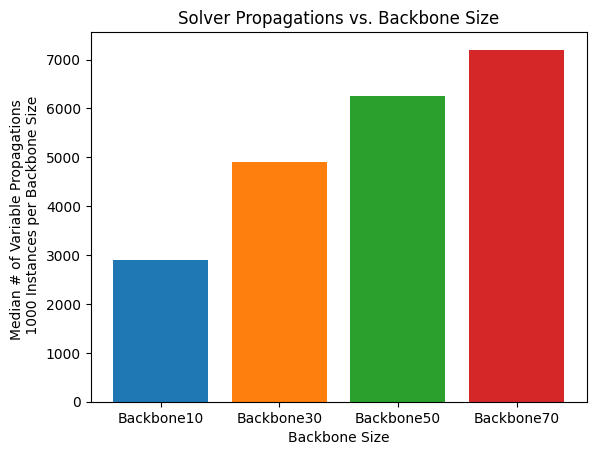

In [77]:
import seaborn as sns
plt.bar("Backbone10", np.median(operations["Backbone10"]))
plt.bar("Backbone30", np.median(operations["Backbone30"]))
plt.bar("Backbone50", np.median(operations["Backbone50"]))
plt.bar("Backbone70", np.median(operations["Backbone70"]))
plt.title("Median # of Variable Propagations \n 1000 Instances per Backbone Size - Glucose Solver")
plt.title("Solver Propagations vs. Backbone Size")
plt.xlabel("Backbone Size")
plt.ylabel("Median # of Variable Propagations \n 1000 Instances per Backbone Size")
#sns.kdeplot(operations["Backbone30"])
#sns.kdeplot(operations["Backbone50"])
#sns.kdeplot(operations["Backbone70"])
#sns.kdeplot(operations["Backbone90"])

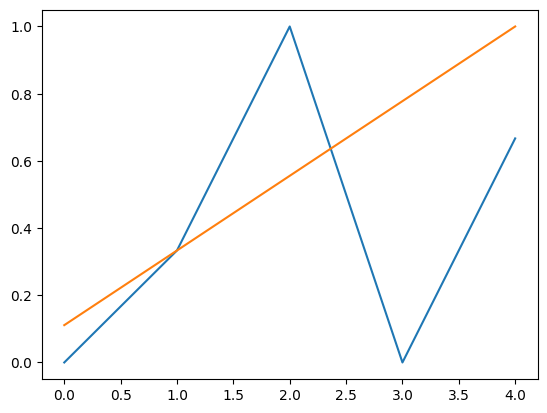

In [45]:
import matplotlib.pyplot as plt

a = np.array(_mc_times) / max(_mc_times)
b = np.array(backbone_size) / max(backbone_size)
plt.plot(a)
plt.plot(b)

In [14]:
g = Glucose42()#warm_start = True)
c = Minicard()
ms = Lingeling()
maple = Mergesat3()

In [15]:
g.append_formula(samp_clauses)
c.append_formula(samp_clauses)
ms.append_formula(samp_clauses)
maple.append_formula(samp_clauses)

In [18]:
g.solve()

Signature: g.solve(assumptions=[])
Docstring: Solve internal formula.
File:      c:\users\shairozs\.conda\envs\pytorch2\lib\site-packages\pysat\solvers.py
Type:      method

In [17]:
c.solve()

False

In [12]:
brute_force(sample)

TypeError: 'int' object is not subscriptable